In [122]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def parameterize_plane(x_range, y_range, num_points):
    """Create a parameterized mesh grid for a plane."""
    x = np.linspace(x_range[0], x_range[1], num_points)
    y = np.linspace(y_range[0], y_range[1], num_points)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)  # Initially, Z is just zero everywhere
    return X, Y, Z

def parametrize_sphere(loc,rad,num_points):
    phi = np.linspace(0,2*np.pi,num_points)
    theta = np.linspace(0,np.pi,num_points)
    phi,theta = np.meshgrid(phi,theta)

    x = rad * np.sin(phi)*np.sin(theta) + loc[0]
    y = rad * np.cos(phi)*np.sin(theta) + loc[1]
    z = rad * np.cos(theta)+loc[2]

    return x,y,z




def plot_3d(X, Y, Z, angle_view=(45, 45),xlim=None,ylim=None,zlim=None,noise_rad=0.3,noise_ind=(40,20,40),name=None):
    """Plot a 3D surface from the given mesh grid."""
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    #add a 3d noise ball around X[noise_ind[0]], ...
#     loc = (X[noise_ind[0],noise_ind[0]],Y[noise_ind[1],noise_ind[1]],Z[noise_ind[2],noise_ind[2]])
    loc = (0.5,0.5,0.5)
    x,y,z = parametrize_sphere(loc,noise_rad,100)
    sphere = ax.plot_surface(x, y, z,alpha=1.0,
                              facecolors=cm.Greys((x-x.min())/(x.max()-x.min())),
                              antialiased=True,linewidth=0.5,zorder=0.3)

    surf = ax.plot_surface(X, Y, Z, facecolors=cm.Blues((X - X.min()) / (X.max() - X.min())),
                            alpha=0.8,antialiased=True,linewidth=0.5,zorder=0.5)
    ax.view_init(elev=angle_view[0], azim=angle_view[1])
    if xlim:
        ax.set_xlim(xlim)
    if ylim:
        ax.set_ylim(ylim)
    if zlim:
        ax.set_zlim(zlim)
    # Hide grid lines

    ax.set_axis_off()


#     if name is not None:
#         plt.savefig(f"{name}.pdf")
    
    plt.show()

def fold_plane_u_shape(X, Y, Z):
    """Apply a U-shaped sine wave fold along the x-axis."""
    Z = np.sin(np.pi * X / (X.max() - X.min())) - np.mean(X)
    return X, Y, Z

def fold_plane_w_shape(X, Y, Z):
    """Apply a W-shaped sine wave fold along the x-axis."""
    Z = np.sin(4 * np.pi * X / (X.max() - X.min()))
    return 2*X/3, Y, Z


<IPython.core.display.Javascript object>


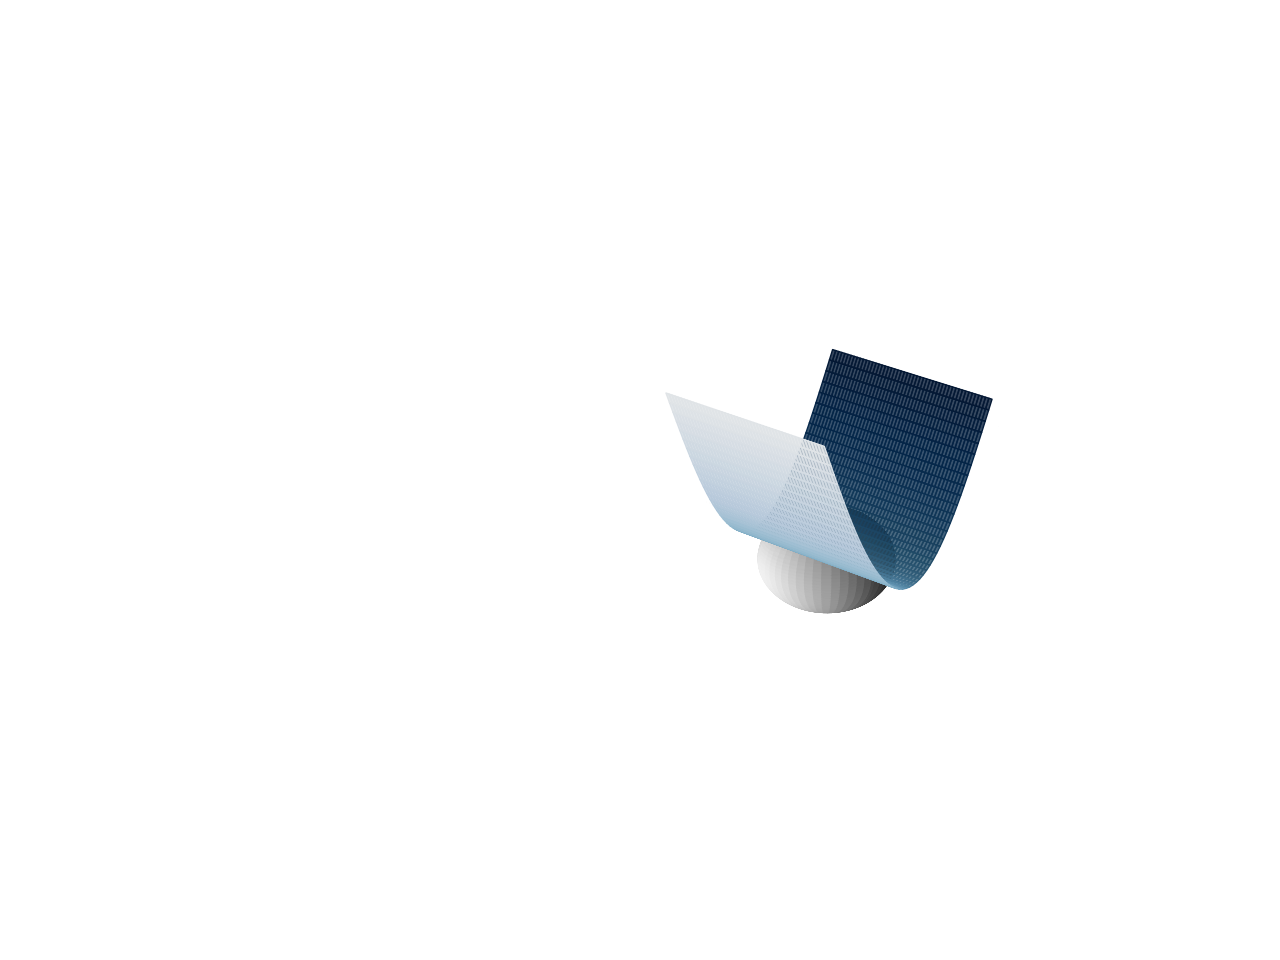

<IPython.core.display.Javascript object>


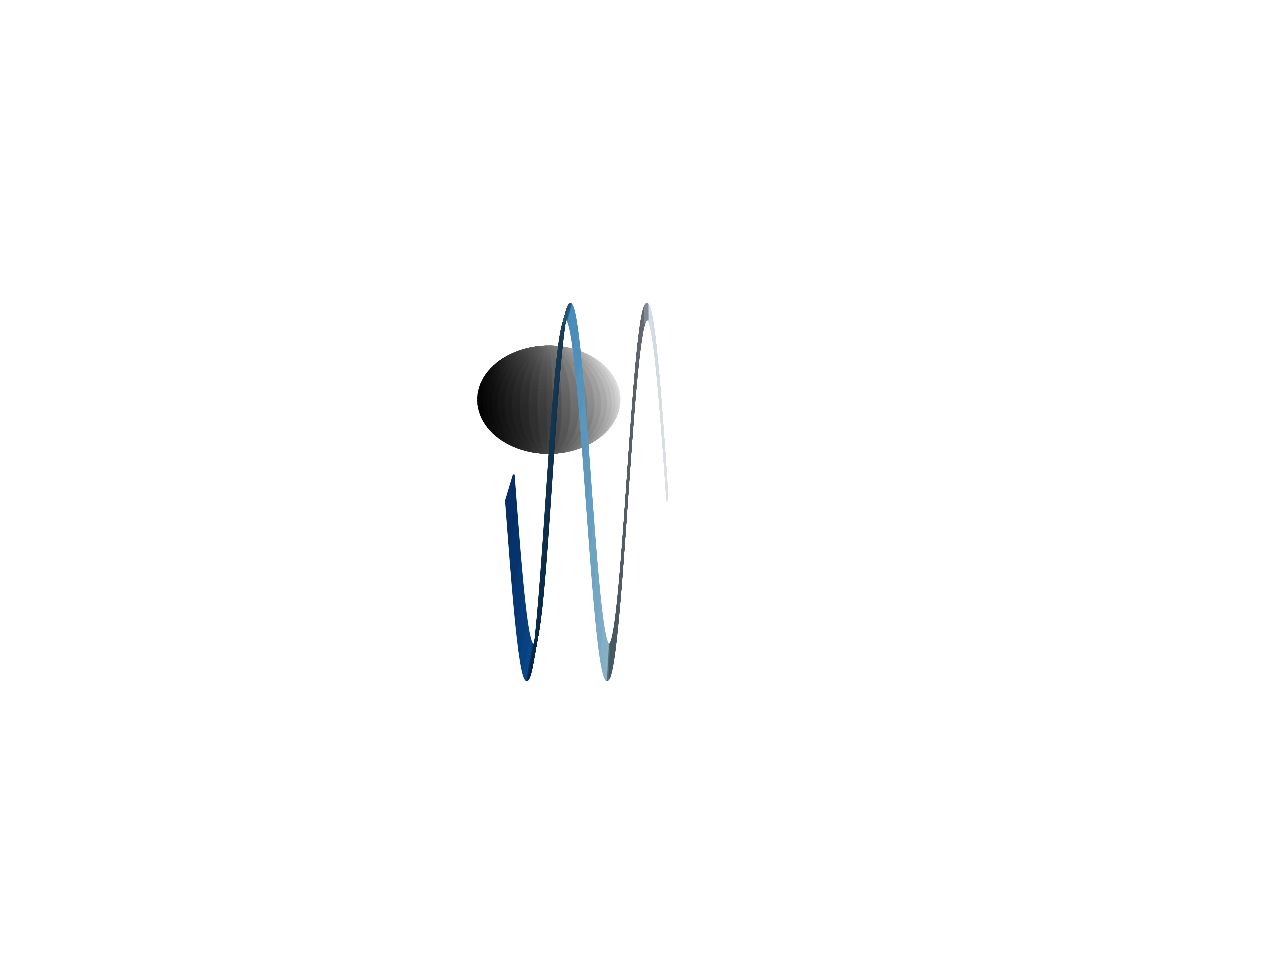

In [123]:
# Parameterize the plane
%matplotlib notebook
x_range = (0, 1)
y_range = (0, 1)
xlim,ylim,zlim = (-1,1),(-1,1),(-1,1)
num_points = 1000
X, Y, Z = parameterize_plane(x_range, y_range, num_points)


# Plot the plane with a U-shaped fold
X_folded_u, Y_folded_u, Z_folded_u = fold_plane_u_shape(X, Y, Z)
plot_3d(X_folded_u, Y_folded_u, Z_folded_u,(-150, 95),xlim,ylim,zlim,name='u_plane')

# Plot the plane with a W-shaped fold
X_folded_w, Y_folded_w, Z_folded_w = fold_plane_w_shape(X, Y, Z)
plot_3d(X_folded_w, Y_folded_w, Z_folded_w,(-7, -95),xlim,ylim,zlim,name='scurled')
